In [193]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

%matplotlib inline
matplotlib.style.use('ggplot')

# Data Ingestion

In [194]:
# Import the movie data
movies_df = pd.read_csv('data/movies.csv')
movies_df.head()

,movieId,name,categories
0,72,Minority Report,SciFi|Action
1,2,Going Away,SciFi|Kids|Horror|Fantasy
2,0,The Alien,SciFi|Kids|Horror
3,49,The Big Game,Sports|Musical|MartialArts
4,1,The Life of Bees,SciFi|Kids|Thriller|Documentary


In [195]:
movies_df.shape

(75, 3)

In [196]:
movies_df.categories

0                                 SciFi|Action
1                    SciFi|Kids|Horror|Fantasy
2                            SciFi|Kids|Horror
3                   Sports|Musical|MartialArts
4              SciFi|Kids|Thriller|Documentary
5                           SciFi|Kids|YouTube
6                   SciFi|Drama|Adventure|Kids
7                           SciFi|Drama|Comedy
8                           SciFi|Drama|Comedy
9     MartialArts|Musical|Drama|SciFi|Thriller
10               SciFi|Drama|Romance|Animation
11                            SciFi|Drama|Kids
12                  SciFi|Drama|Adventure|Kids
13            SciFi|Drama|Tv|Fantasy|Adventure
14             SciFi|Drama|Musical|MartialArts
15                          SciFi|Drama|Action
16                          SciFi|Drama|Action
17                          SciFi|Drama|Action
18                        SciFi|Drama|Disaster
19                          SciFi|Kids|Fantasy
20                          SciFi|Kids|Fantasy
21           

In [197]:
print(movies_df.categories.str.split('|'))

0                                    [SciFi, Action]
1                     [SciFi, Kids, Horror, Fantasy]
2                              [SciFi, Kids, Horror]
3                     [Sports, Musical, MartialArts]
4               [SciFi, Kids, Thriller, Documentary]
5                             [SciFi, Kids, YouTube]
6                    [SciFi, Drama, Adventure, Kids]
7                             [SciFi, Drama, Comedy]
8                             [SciFi, Drama, Comedy]
9     [MartialArts, Musical, Drama, SciFi, Thriller]
10                [SciFi, Drama, Romance, Animation]
11                              [SciFi, Drama, Kids]
12                   [SciFi, Drama, Adventure, Kids]
13            [SciFi, Drama, Tv, Fantasy, Adventure]
14              [SciFi, Drama, Musical, MartialArts]
15                            [SciFi, Drama, Action]
16                            [SciFi, Drama, Action]
17                            [SciFi, Drama, Action]
18                          [SciFi, Drama, Dis

In [198]:
#get rid of columns not needed
del movies_df['name']
movies_df.head()

,movieId,categories
0,72,SciFi|Action
1,2,SciFi|Kids|Horror|Fantasy
2,0,SciFi|Kids|Horror
3,49,Sports|Musical|MartialArts
4,1,SciFi|Kids|Thriller|Documentary


In [199]:
#Verify no null records
movies_df[movies_df.categories.isnull()]

,movieId,categories


In [200]:
#Import the ratings data
ratings_df = pd.read_csv('data/ratings.csv')
ratings_df.head()

,personId,movieId,progress,lastWatch
0,61,72,11%,3/21/20 8:20
1,71,73,14%,3/5/20 5:20
2,4,2,10%,1/1/70 0:00
3,16,3,2%,1/14/19 23:46
4,40,4,5%,8/5/19 16:12


In [201]:
ratings_df.shape

(1849, 4)

# Data Inspection & Visualization

In [202]:
#see the number of people that have watched movie 73
ratings_df[ratings_df.movieId == 73]

,personId,movieId,progress,lastWatch
1,71,73,14%,3/5/20 5:20
226,102,73,95%,8/30/19 20:00
1812,0,73,9%,1/29/20 19:37
1813,12,73,3%,9/5/18 2:59
1814,34,73,35%,1/16/20 14:26
1815,61,73,5%,2/26/19 19:34
1816,64,73,1%,8/24/18 14:36
1817,70,73,5%,10/10/18 3:34
1818,76,73,2%,11/1/18 0:52
1819,102,73,2%,10/9/18 3:56


In [203]:
#build a cross-tabulation table that shows the frequency with which certain groups of data appear
#show which movies a person watched
pd.crosstab(ratings_df.personId,ratings_df.movieId)

movieId,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
personId,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [204]:
ratings_df.dtypes

personId      int64
movieId       int64
progress     object
lastWatch    object
dtype: object

In [205]:
#data conversion
#convert lastWatch string to date object
ratings_df['lastWatch']= pd.to_datetime(ratings_df['lastWatch']) 

In [206]:
#confirm datatype has changed
ratings_df.dtypes

personId              int64
movieId               int64
progress             object
lastWatch    datetime64[ns]
dtype: object

In [207]:
ratings_df.head()

,personId,movieId,progress,lastWatch
0,61,72,11%,2020-03-21 08:20:00
1,71,73,14%,2020-03-05 05:20:00
2,4,2,10%,1970-01-01 00:00:00
3,16,3,2%,2019-01-14 23:46:00
4,40,4,5%,2019-08-05 16:12:00


In [208]:
#convert progress percentage string to numeric data
ratings_df['progress'] = ratings_df['progress'].str.rstrip('%').astype('float') / 100.0

In [209]:
ratings_df.dtypes

personId              int64
movieId               int64
progress            float64
lastWatch    datetime64[ns]
dtype: object

In [210]:
ratings_df.head()

,personId,movieId,progress,lastWatch
0,61,72,0.11,2020-03-21 08:20:00
1,71,73,0.14,2020-03-05 05:20:00
2,4,2,0.10,1970-01-01 00:00:00
3,16,3,0.02,2019-01-14 23:46:00
4,40,4,0.05,2019-08-05 16:12:00


In [211]:
movies_df.head()

,movieId,categories
0,72,SciFi|Action
1,2,SciFi|Kids|Horror|Fantasy
2,0,SciFi|Kids|Horror
3,49,Sports|Musical|MartialArts
4,1,SciFi|Kids|Thriller|Documentary


In [212]:
ratings_df.head()

,personId,movieId,progress,lastWatch
0,61,72,0.11,2020-03-21 08:20:00
1,71,73,0.14,2020-03-05 05:20:00
2,4,2,0.10,1970-01-01 00:00:00
3,16,3,0.02,2019-01-14 23:46:00
4,40,4,0.05,2019-08-05 16:12:00


In [213]:
#count the amount of times a personId appears in the dataset
#helps us understand who watches the most movies
ratings_df.groupby('personId').size()

personId
0       8
1       3
2       1
3       5
4      33
5       3
6       2
7       1
8       3
9       1
10     14
11      2
12     44
13     11
14      7
15      2
16     12
17      1
18      4
19      1
20      3
21      8
22      1
23      6
24      3
25      1
26      1
27      1
28      1
29      2
       ..
268     8
269    17
270     3
271     2
272     1
273     2
274     2
275    10
276    12
277     5
278     2
279     1
280    10
281     4
282    11
283     1
284     2
285     1
286     6
287     1
288     5
289     5
290     2
291     2
292     1
293     3
294     4
295     1
296     2
297    14
Length: 287, dtype: int64

In [214]:
#print rows for a particular person (ie person 61) - show the movies they've watched
ratings_df.loc[ratings_df['personId'] == 61]

,personId,movieId,progress,lastWatch
0,61,72,0.11,2020-03-21 08:20:00
5,61,5,0.43,1970-01-01 00:00:00
14,61,1,0.04,2018-04-13 03:02:00
32,61,4,0.07,2018-07-19 08:33:00
45,61,5,0.08,2019-11-14 20:42:00
69,61,21,0.97,2019-03-04 00:32:00
113,61,10,0.04,2018-05-22 23:30:00
148,61,15,0.02,2020-04-02 05:13:00
207,61,54,0.24,2019-11-13 01:09:00
371,61,5,0.74,2019-06-16 05:01:00


In [215]:
#count the amount of times a movieId appears in the dataset
#see which movies are the most popular
ratings_df.groupby('movieId').size()

movieId
0        1
1        2
2        3
3       10
4        4
5       85
6        5
7        6
8        6
9        7
10       8
11      39
12      54
13      36
14      28
15      15
16      23
17     154
18      58
19      39
20      26
21      15
22       9
23      19
24     105
25       9
26      27
27       4
28      16
29      17
      ... 
177      1
178      1
179      1
180      1
181      1
182      1
183      1
184      1
185      1
186      1
187      1
188      1
189      1
190      1
191      1
192      1
193      1
194      1
195      1
196      1
197      1
198      1
199      1
200      1
201      1
202      1
203      1
204      1
205      1
206      1
Length: 207, dtype: int64

In [216]:
#print rows for a particular movie (ie movie 5 - The Escape to Witch Mountain) - show the people that have watched it
ratings_df.loc[ratings_df['movieId'] == 5]

,personId,movieId,progress,lastWatch
5,61,5,0.43,1970-01-01 00:00:00
18,123,5,0.22,1970-01-01 00:00:00
33,70,5,0.80,2020-03-13 04:56:00
45,61,5,0.08,2019-11-14 20:42:00
360,4,5,0.05,2018-07-05 02:08:00
361,10,5,0.03,2019-12-04 16:33:00
362,12,5,0.87,2019-03-23 04:36:00
363,14,5,0.01,2020-02-19 22:40:00
364,21,5,0.06,2019-12-19 16:29:00
365,40,5,0.87,2020-03-03 18:13:00


In [217]:
#calculate the average watch time (ie progress) percentange by category per person
#figure out person's favorite category
#this function can be limited by a set amount of categories (for now SciFi and Drama)

#function to get the category progress
def get_category_watch_time(ratings, movies, categories, column_names):
    category_progress = pd.DataFrame(columns = ['personId'])
    
    #add personId to list of columns
    column_names.insert(0,'personId')
    
    for category in categories: #loop for SciFi and Drama categories
        #retrieve records with the given category (ie first iteration is SciFi, second iteration is Drama)
        movie_categories = movies[movies['categories'].str.contains(category)]
        
        #determine the average watch time for the given category; retain the personId
        avg_watch_time_per_person = ratings[ratings['movieId'].isin(movie_categories['movieId'])].loc[:, ['personId', 'progress']].groupby(['personId'])['progress'].mean().round(2).reset_index()      
    
        #merge the progress for the given catetgory with the prior categories
        category_progress = category_progress.merge(avg_watch_time_per_person, on='personId', how='outer')
       
    #update column names to be meaningful column names
    category_progress.columns = column_names  
    return category_progress

# Calculate the average rating of SciFi and Drama categories
category_watch_time = get_category_watch_time(ratings_df, movies_df, ['SciFi', 'Drama'], ['avg_scifi_watch', 'avg_drama_watch'])
category_watch_time

#NaN means they haven't watched any movies in that category


,personId,avg_scifi_watch,avg_drama_watch
0,0,0.52,0.44
1,1,0.50,0.85
2,2,0.25,0.25
3,3,0.99,0.98
4,4,0.24,0.18
5,5,0.05,0.05
6,7,0.36,NaN
7,8,0.51,0.45
8,9,0.91,0.91
9,10,0.43,0.26


In [218]:
def get_list_of_categories(movies):
    category_list = []
    
    for category in movies.categories.str.split('|'):
        for name in category:
            if name not in category_list: 
                category_list.append(name.strip())
            
    return category_list
    

In [219]:
def get_column_name_list(category_list):
    column_name = []
    
    for category in category_list:
        column_name.append('avg_' + category.strip() + '_watch')
      
    return column_name

In [220]:
#category watch time across ALL people across ALL categories
def get_all_category_watch_time(ratings, movies):
    category_progress = pd.DataFrame(columns = ['personId'])
    category_list = get_list_of_categories(movies)
    column_names = get_column_name_list(category_list)
    
    #add personId to list of columns
    column_names.insert(0,'personId')
    
    for category in category_list:        
        movie_categories = movies[movies['categories'].str.contains(category)]
        
        #determine the average watch time for the given category; retain the personId
        avg_watch_time_per_user = ratings[ratings['movieId'].isin(movie_categories['movieId'])].loc[:, ['personId', 'progress']].groupby(['personId'])['progress'].mean().round(2).reset_index()      
    
        #merge the progress for the given catetgory with the prior categories
        category_progress = category_progress.merge(avg_watch_time_per_user, on='personId', how='outer')
            
    category_progress.columns = column_names
    return category_progress
    
# Calculate the average rating all categories per user
category_watch_time_df = get_all_category_watch_time(ratings_df, movies_df)
category_watch_time_df 

,personId,avg_SciFi_watch,avg_Action_watch,avg_Kids_watch,avg_Horror_watch,avg_Fantasy_watch,avg_Sports_watch,avg_Musical_watch,avg_MartialArts_watch,avg_Thriller_watch,...,avg_Romance_watch,avg_Animation_watch,avg_Tv_watch,avg_Disaster_watch,avg_Epic_watch,avg_War_watch,avg_Western_watch,avg_Slasher_watch,avg_History_watch,avg_Horror_watch
0,0,0.52,0.20,0.63,0.09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,NaN,0.09
1,1,0.50,NaN,0.14,0.23,0.85,NaN,NaN,NaN,NaN,...,0.23,NaN,0.85,NaN,NaN,NaN,NaN,NaN,NaN,0.23
2,2,0.25,NaN,NaN,NaN,NaN,NaN,0.25,0.25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.99,0.98,0.74,NaN,NaN,0.22,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN
4,4,0.24,0.23,0.32,0.09,0.22,0.09,0.03,0.16,NaN,...,0.05,0.02,0.06,0.02,0.05,0.35,NaN,NaN,0.04,0.09
5,5,0.05,NaN,0.02,NaN,0.02,NaN,NaN,0.08,NaN,...,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN
6,7,0.36,NaN,0.36,NaN,0.36,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,0.51,0.45,0.78,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,0.91,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,0.43,0.24,0.58,NaN,0.04,NaN,0.06,0.06,0.15,...,NaN,NaN,0.02,0.89,NaN,0.03,NaN,NaN,NaN,NaN


In [221]:
#category watch time for a SINGLE person
#print rows for a particular person (ie person 61) - show the movies they've watched
category_watch_time_df.loc[category_watch_time_df['personId'] == 61]

,personId,avg_SciFi_watch,avg_Action_watch,avg_Kids_watch,avg_Horror_watch,avg_Fantasy_watch,avg_Sports_watch,avg_Musical_watch,avg_MartialArts_watch,avg_Thriller_watch,...,avg_Romance_watch,avg_Animation_watch,avg_Tv_watch,avg_Disaster_watch,avg_Epic_watch,avg_War_watch,avg_Western_watch,avg_Slasher_watch,avg_History_watch,avg_Horror_watch
46,61,0.24,0.11,0.31,0.31,0.12,0.27,0.16,0.32,0.05,...,0.35,0.01,0.05,NaN,0.52,0.24,NaN,0.21,0.04,0.31


# Training

In [222]:
category_watch_time_df.shape

(268, 25)

In [223]:
category_watch_time_df

,personId,avg_SciFi_watch,avg_Action_watch,avg_Kids_watch,avg_Horror_watch,avg_Fantasy_watch,avg_Sports_watch,avg_Musical_watch,avg_MartialArts_watch,avg_Thriller_watch,...,avg_Romance_watch,avg_Animation_watch,avg_Tv_watch,avg_Disaster_watch,avg_Epic_watch,avg_War_watch,avg_Western_watch,avg_Slasher_watch,avg_History_watch,avg_Horror_watch
0,0,0.52,0.20,0.63,0.09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,NaN,0.09
1,1,0.50,NaN,0.14,0.23,0.85,NaN,NaN,NaN,NaN,...,0.23,NaN,0.85,NaN,NaN,NaN,NaN,NaN,NaN,0.23
2,2,0.25,NaN,NaN,NaN,NaN,NaN,0.25,0.25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.99,0.98,0.74,NaN,NaN,0.22,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN
4,4,0.24,0.23,0.32,0.09,0.22,0.09,0.03,0.16,NaN,...,0.05,0.02,0.06,0.02,0.05,0.35,NaN,NaN,0.04,0.09
5,5,0.05,NaN,0.02,NaN,0.02,NaN,NaN,0.08,NaN,...,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN
6,7,0.36,NaN,0.36,NaN,0.36,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,0.51,0.45,0.78,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,0.91,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,0.43,0.24,0.58,NaN,0.04,NaN,0.06,0.06,0.15,...,NaN,NaN,0.02,0.89,NaN,0.03,NaN,NaN,NaN,NaN


In [224]:
#replace NaN with 0
category_watch_time_df = category_watch_time_df.fillna(0)
category_watch_time_df

,personId,avg_SciFi_watch,avg_Action_watch,avg_Kids_watch,avg_Horror_watch,avg_Fantasy_watch,avg_Sports_watch,avg_Musical_watch,avg_MartialArts_watch,avg_Thriller_watch,...,avg_Romance_watch,avg_Animation_watch,avg_Tv_watch,avg_Disaster_watch,avg_Epic_watch,avg_War_watch,avg_Western_watch,avg_Slasher_watch,avg_History_watch,avg_Horror_watch
0,0,0.52,0.20,0.63,0.09,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.40,0.00,0.00,0.00,0.09
1,1,0.50,0.00,0.14,0.23,0.85,0.00,0.00,0.00,0.00,...,0.23,0.00,0.85,0.00,0.00,0.00,0.00,0.00,0.00,0.23
2,2,0.25,0.00,0.00,0.00,0.00,0.00,0.25,0.25,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,3,0.99,0.98,0.74,0.00,0.00,0.22,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.00
4,4,0.24,0.23,0.32,0.09,0.22,0.09,0.03,0.16,0.00,...,0.05,0.02,0.06,0.02,0.05,0.35,0.00,0.00,0.04,0.09
5,5,0.05,0.00,0.02,0.00,0.02,0.00,0.00,0.08,0.00,...,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00
6,7,0.36,0.00,0.36,0.00,0.36,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,8,0.51,0.45,0.78,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,9,0.91,0.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,10,0.43,0.24,0.58,0.00,0.04,0.00,0.06,0.06,0.15,...,0.00,0.00,0.02,0.89,0.00,0.03,0.00,0.00,0.00,0.00


In [225]:
#remove personId from dataframe
category_watch_time_list = category_watch_time_df.drop(['personId'], axis=1)

In [226]:
category_watch_time_list

,avg_SciFi_watch,avg_Action_watch,avg_Kids_watch,avg_Horror_watch,avg_Fantasy_watch,avg_Sports_watch,avg_Musical_watch,avg_MartialArts_watch,avg_Thriller_watch,avg_Documentary_watch,...,avg_Romance_watch,avg_Animation_watch,avg_Tv_watch,avg_Disaster_watch,avg_Epic_watch,avg_War_watch,avg_Western_watch,avg_Slasher_watch,avg_History_watch,avg_Horror_watch
0,0.52,0.20,0.63,0.09,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.40,0.00,0.00,0.00,0.09
1,0.50,0.00,0.14,0.23,0.85,0.00,0.00,0.00,0.00,0.00,...,0.23,0.00,0.85,0.00,0.00,0.00,0.00,0.00,0.00,0.23
2,0.25,0.00,0.00,0.00,0.00,0.00,0.25,0.25,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.99,0.98,0.74,0.00,0.00,0.22,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.00
4,0.24,0.23,0.32,0.09,0.22,0.09,0.03,0.16,0.00,0.18,...,0.05,0.02,0.06,0.02,0.05,0.35,0.00,0.00,0.04,0.09
5,0.05,0.00,0.02,0.00,0.02,0.00,0.00,0.08,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00
6,0.36,0.00,0.36,0.00,0.36,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.51,0.45,0.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.91,0.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.43,0.24,0.58,0.00,0.04,0.00,0.06,0.06,0.15,0.22,...,0.00,0.00,0.02,0.89,0.00,0.03,0.00,0.00,0.00,0.00


In [227]:
# Turn our dataset into a list
category_watch_time_list = category_watch_time_list.values
print(category_watch_time_list)

[[0.52 0.2  0.63 ... 0.   0.   0.09]
 [0.5  0.   0.14 ... 0.   0.   0.23]
 [0.25 0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]


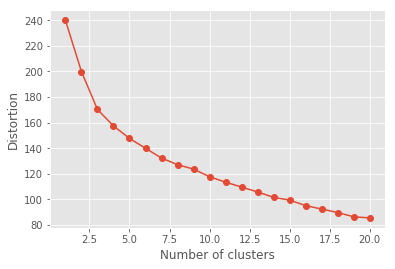

In [228]:
# Import KMeans
from sklearn.cluster import KMeans

# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 21):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=20, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(category_watch_time_list)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 21), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [229]:
# Import KMeans
from sklearn.cluster import KMeans

# Create an instance of KMeans to find 3 clusters
#km = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)
km = KMeans(n_clusters=20, random_state=0)

# Use fit_predict to cluster the dataset
# Returns a cluster prediction for each person / ie cluster labels
predictions = km.fit_predict(category_watch_time_list)

print(predictions)
print("-------")
print(type(predictions))
print(predictions.shape)
print(category_watch_time_list.shape)

[ 8  2  0  8  1  0  1  8  8 19  0 12 12  5  1  1  4  1  0  4 19  0  0  4
  1  1 11  0  0  0  8  0  8  0  9 12  8 13  1  4 12 16 19 11 12  1  7  0
 12  7 12  6  1  0  9  0  1  7 12  1  0  1 11  9  9  7 16 13  0 11  0 15
 18 15  0 12  7  4  2 15  0  0  0  4  1  1  1  0  0  6  2 11  1  4  1 13
  0  6  8  8  0  0  8  4  1  4  4  0  7  1  1  4  0  8  0  5  3  1 11  4
  4  1  7  0 12 11 11  1 11  0  1  4  1  1  1  1  1 11  4  5  9  8  1  7
  0  7 11  4  2  6  7  6  9  1 12  8  0 11  0  1  1  8  1 13  4  6  9  0
  4  0  9  4  1  0  4  2 13  4  1  0  1  1  2  2  0  1  1  5  0  7  1  1
 11  0  1 16  3  9  0 12 12 17  1 11  4  0  4  2  7  9 11 11  6 11  0  8
  0  0  0 11  0  0  6  0  0 11 11 11  0  6 11 11 11 11  0 11 11 11  0  0
  0  0 11  0  0  0  0 10  0 10  0 10  0  0 14  0  0  0  0  0 10  0  0 10
  0 10  0  0]
-------
<class 'numpy.ndarray'>
(268,)
(268, 24)


In [230]:
#convert numpy array to dataframe and give column name of cluster
cluster_df = pd.DataFrame(data=predictions)
cluster_df.columns = ['assigned_cluster']
cluster_df

,assigned_cluster
0,8
1,2
2,0
3,8
4,1
5,0
6,1
7,8
8,8
9,19


In [231]:
print("The shape is-->", cluster_df.shape)
print("The shape is-->", category_watch_time_df.shape)

The shape is--> (268, 1)
The shape is--> (268, 25)


# Assigned Cluster
Now that we understand which cluster a person is assigned to, we can recommend movies to this person based on their assigned group (ie cluster)

In [232]:
# merge data to see the assigned cluster for personId and drop unnecessary columns
ratings_cluster_df = pd.DataFrame(columns = ['personId', 'assigned_cluster'])
ratings_cluster_df = pd.concat([cluster_df, category_watch_time_df], axis=1)
ratings_cluster_df = ratings_cluster_df[ratings_cluster_df.columns[ratings_cluster_df.columns.isin(['personId', 'assigned_cluster'])]]
ratings_cluster_df


,assigned_cluster,personId
0,8,0
1,2,1
2,0,2
3,8,3
4,1,4
5,0,5
6,1,7
7,8,8
8,8,9
9,19,10


In [233]:
#count the amount of times a cluster appears in the dataset
ratings_cluster_df.groupby('assigned_cluster').size()

assigned_cluster
0     75
1     45
2      8
3      2
4     23
5      4
6      9
7     12
8     15
9     10
10     6
11    29
12    13
13     5
14     1
15     3
16     3
17     1
18     1
19     3
dtype: int64

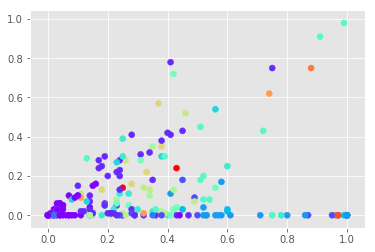

In [234]:
#plot the data
plt.scatter(category_watch_time_list[:,0],category_watch_time_list[:,1], c=km.labels_, cmap='rainbow')

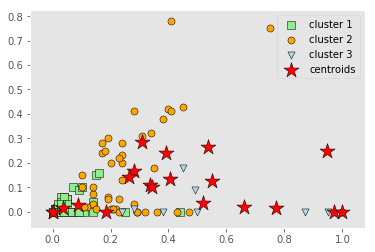

In [235]:
# visualize the clusters that k-means identified in the dataset together with the cluster centroids. 
# These are stored under the cluster_centers_ attribute of the fitted KMeans object
# plot the 3 clusters

plt.scatter(
    category_watch_time_list[predictions == 0, 0], category_watch_time_list[predictions == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    category_watch_time_list[predictions == 1, 0], category_watch_time_list[predictions == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    category_watch_time_list[predictions == 2, 0], category_watch_time_list[predictions == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

# Understanding Clusters
At this point, we have clustered people into 20 clusters. With our K-mean clustering model, we can produce a list of all people and which cluster they belong to. So, we can take a specific cluster and study the person's characteristics along known dimensions.

Let’s study the characteristics of cluster #6. 

In [236]:
#What are the commonality between the people in cluster 6

#show people assigned to Cluster #6
ratings_cluster_df = ratings_cluster_df.loc[ratings_cluster_df['assigned_cluster'] == 5]

ratings_cluster_df.shape

(4, 2)

In [237]:
ratings_cluster_df

,assigned_cluster,personId
13,5,14
115,5,158
139,5,191
187,5,264


In [238]:
#Import the data
ratings = pd.read_csv('data/ratings.csv')
movies = pd.read_csv('data/movies.csv')

#Get only the people progress records that appear in cluster 6
cluster6_ratings_df = ratings[ratings['personId'].isin(ratings_cluster_df['personId'])]

#print people
cluster6_ratings_df

,personId,movieId,progress,lastWatch
58,14,10,97%,10/29/19 15:23
175,14,22,100%,12/11/19 14:24
265,158,112,2%,10/2/19 5:59
289,191,136,2%,1/24/20 4:11
336,264,183,20%,9/10/19 4:06
363,14,5,1%,2/19/20 22:40
401,158,5,87%,2/15/20 6:44
407,191,5,99%,3/20/20 3:39
433,264,5,88%,6/8/19 12:58
660,14,17,2%,11/13/19 20:21


In [239]:
#sort values by percentage (sorting by string value)
cluster6_ratings_df.sort_values("progress", inplace=True, ascending=False)

cluster6_ratings_df

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,personId,movieId,progress,lastWatch
407,191,5,99%,3/20/20 3:39
1808,264,33,98%,3/7/19 13:03
1800,191,33,98%,7/19/19 6:22
58,14,10,97%,10/29/19 15:23
1392,264,14,90%,8/16/19 6:50
433,264,5,88%,6/8/19 12:58
401,158,5,87%,2/15/20 6:44
1797,158,33,81%,8/26/19 10:55
710,158,17,3%,8/14/19 7:03
742,264,17,3%,11/15/19 2:05


In [240]:
#see how many people watched each movie
cluster6_ratings_df.groupby(['movieId'])['personId'].count()

movieId
5      4
10     1
14     1
17     3
22     1
24     1
33     3
39     1
58     1
112    1
136    1
183    1
Name: personId, dtype: int64

In [241]:
#convert progress percentage string to numeric data
cluster6_ratings_df['progress'] = cluster6_ratings_df['progress'].str.rstrip('%').astype('float') / 100.0

#limit to only movies that are above a 90% watch rate
cluster6_ratings_df = cluster6_ratings_df.loc[cluster6_ratings_df['progress'] > .90]

print(cluster6_ratings_df.shape)

cluster6_ratings_df

(7, 4)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,personId,movieId,progress,lastWatch
407,191,5,0.99,3/20/20 3:39
1808,264,33,0.98,3/7/19 13:03
1800,191,33,0.98,7/19/19 6:22
58,14,10,0.97,10/29/19 15:23
175,14,22,1.00,12/11/19 14:24
1277,14,24,1.00,10/21/19 16:17
1441,14,58,1.00,10/14/19 20:52


In [242]:
#Get the movie categories for movies watched (movieId) by people in cluster 

cluster6_movies_watched_df = movies[movies['movieId'].isin(cluster6_ratings_df['movieId'])]
#Get rid of NaN
cluster6_movies_watched_df.dropna(subset=['categories'], inplace=True)
category_list = get_list_of_categories(cluster6_movies_watched_df)
print("The amount of categories for Cluster 6: ", len(category_list))
print("The categories in Cluster 6", category_list)

The amount of categories for Cluster 6:  6
The categories in Cluster 6 ['SciFi', 'Drama', 'Kids', 'Adventure', 'Horror', 'Romance']


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [243]:
#The amount of possible categories
movies = pd.read_csv('data/movies.csv')
movies.dropna(subset=['categories'], inplace=True)
print("The amount of total possible categories: ", len(get_list_of_categories(movies)))

The amount of total possible categories:  24


# Final Result

# When a person logs in to watch a movie, retrieve the person ID, determine the cluster the person belongs to and recommend movies with categories associated to that cluster 